# Charity Funding Predictor

## Preprocessing

In [1]:
# Import our dependencies
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
# tf.keras.callbacks.ModelCheckpoint

#  read the charity_data.csv.
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
pd.options.display.max_columns = 50

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(columns = ['EIN', 'NAME'])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = df['APPLICATION_TYPE'].value_counts() \
                                                        .loc[lambda x : x < 500] \
                                                        .index \
                                                        .to_list()
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    df['APPLICATION_TYPE'] = df['APPLICATION_TYPE'].replace(app,"Other")

In [8]:
# Check to make sure binning was successful
df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
df['CLASSIFICATION'].value_counts().loc[lambda x: x>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = df['CLASSIFICATION'].value_counts() \
                                                    .loc[lambda x : x < 1000] \
                                                    .index \
                                                    .to_list()
# Replace in dataframe
for cls in classifications_to_replace:
    df['CLASSIFICATION'] = df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION               6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
transformed_df = pd.get_dummies(df)
transformed_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays

X = transformed_df.drop(columns = 'IS_SUCCESSFUL')
y = transformed_df['IS_SUCCESSFUL']

In [15]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 75)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25724, 43), (8575, 43), (25724,), (8575,))

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=30, activation="tanh"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
nn_model

In [19]:
# Train the model

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True, 
                                                 save_freq = 5*batch_size, 
                                                 verbose=1)

# Save the weights using the `checkpoint_path` format
nn_model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, 
                         batch_size=batch_size,
                        validation_data=(X_test, y_test), callbacks=[cp_callback], verbose = 1)

Epoch 1/50
155/804 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.6907
Epoch 00001: saving model to training\cp-0001.ckpt
287/804 [=========>....................] - ETA: 0s - loss: 0.5880 - accuracy: 0.7035
Epoch 00001: saving model to training\cp-0001.ckpt
434/804 [===============>..............] - ETA: 0s - loss: 0.5781 - accuracy: 0.7127
Epoch 00001: saving model to training\cp-0001.ckpt
570/804 [====================>.........] - ETA: 0s - loss: 0.5752 - accuracy: 0.7161
Epoch 00001: saving model to training\cp-0001.ckpt
718/804 [=========================>....] - ETA: 0s - loss: 0.5753 - accuracy: 0.7151
Epoch 00001: saving model to training\cp-0001.ckpt
804/804 [==============================] - 1s 957us/step - loss: 0.5735 - accuracy: 0.7158 - val_loss: 0.7545 - val_accuracy: 0.4746
Epoch 2/50
 79/804 [=>............................] - ETA: 0s - loss: 0.5607 - accuracy: 0.7290
Epoch 00002: saving model to training\cp-0002.ckpt
312/804 [==========>.........

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5477 - accuracy: 0.7355 - 367ms/epoch - 1ms/step
Loss: 0.5477002859115601, Accuracy: 0.7355102300643921


In [21]:
# Export our model to HDF5 file

nn_model.save('../Resources/AlphabetSoupCharity.h5')

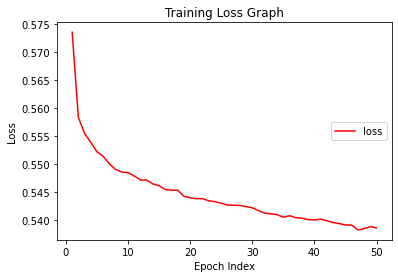

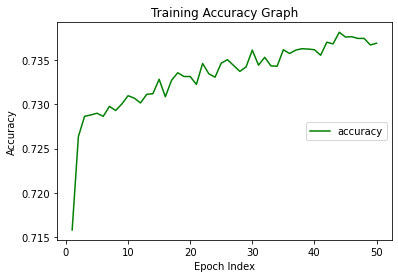

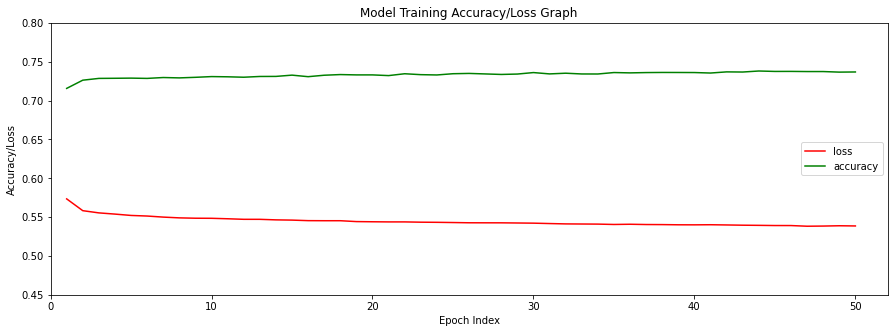

In [22]:
history_df = pd.DataFrame(fit_model.history)

history_df.index += 1

history_df.plot(y='loss', color = 'red')
plt.xlabel('Epoch Index')
plt.ylabel('Loss')
plt.title('Training Loss Graph')
plt.legend (loc = 'center right')
plt.savefig("../Images/Model_Loss.png")


history_df.plot(y='accuracy', color = 'green')
plt.xlabel('Epoch Index')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Graph')
plt.legend (loc = 'center right')
plt.savefig("../Images/Model_Accuracy.png")


plt.figure(figsize = (15,5))
plt.plot(history_df['loss'], color='red', label='loss', )
plt.plot(history_df['accuracy'], color='green', label='accuracy')
plt.xlim([0, 52])
plt.ylim([0.45, 0.8])
plt.xlabel('Epoch Index')
plt.ylabel('Accuracy/Loss')
plt.title('Model Training Accuracy/Loss Graph')
plt.legend(loc = 'center right')
plt.savefig("../Images/ModelAccuracy_Loss.png")
plt.show()